# SPEECH-EMOTION-PROBLEM

Speech-Emotion-Problem aims at solving the classification of voice samples from the MELD dataset. The data provided by MIDAS-IIITD is a subset of the dataset in MELD. This dataset contains samples of audio in `.wav` format and is divided into five categories or classes

- happy
- neutral
- sad
- disgust
- fear

Since the dataset is audio `.wav` files hence we need to define a way to perform classification over the audio files.

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

### Using Spectrograms
A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.


In [19]:
import librosa
import librosa.display
import numpy as np
import os
from os.path import isfile
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

train_folder = "meld/train/"
train_img_folder = "meld/train_img/train"

classes = [el for el in os.listdir(train_folder)]

print(classes)



['neutral_4', 'disgust', 'neutral_3', 'neutral', 'sad', 'neutral_1', 'happy_1', 'fear', 'neutral_2', 'happy']


### Converting Audio to Spectrogram
We make use of `librosa` library to compute the `short-time-fourier-transform` or `stft` and normalize it to generate a spectrogram for an input audio signal. And then use `pylab` to save the spectrogram geneated to a corresponding image.

- `stft_spec` : creates the spectrogram
- `cvt_wav_2_img` : converts a `wav_file` in the `input_folder` to spectrogram and saves it to the `target_folder` specified

Implementation is given below

In [20]:
hop_length = 512
window_size = 1024
sr = 8000 # human voice range does not exceed 8khz; will be used for resampling

# computes a stft spectrogram for an audio file
def stft_spec(folder, wav_file):
  y, o_sr = librosa.load(os.path.join(folder, wav_file))
  y = librosa.resample(y, o_sr, sr)
  window = np.hanning(window_size)
  out  = librosa.core.spectrum.stft(y, n_fft = window_size, hop_length = hop_length, 
       window=window)
  out = 2 * np.abs(out) / np.sum(window)
  return librosa.display.specshow(librosa.amplitude_to_db(out,ref=np.max))

#converts a wav file in a folder to a png image ans saves it to a target
def cvt_wav_2_img(folder, wav_file, target):
  # loads the wav_file and saves it as the required spectrogram
  import pylab
  pylab.axis('off') # no axis
  pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
  stft_spec(folder, wav_file)
  pylab.savefig(os.path.join(target, os.path.splitext(wav_file)[0] + ".png"), bbox_inches=None, pad_inches=0)
  pylab.close()

Let us see what a spectrogram for an audio file `MEL_dia95_utt13_positive_HAP.wav` looks like

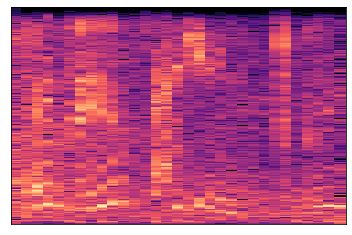

In [21]:
wav_file_loc = "meld/train/happy/"
wav_file_name = "MEL_dia95_utt14_positive_HAP.wav"

stft_spec(wav_file_loc, wav_file_name)

### Use of Spectrogram

It is difficult to perform classification on audio samples and the methodologies are not well known, but we do know how to perform classification on images since image classification is a hot topic and the methods are pretty well-known and readily available. Since an audio file can be represented into a corresponding image of its spectrogram therefore we can simply convert the entire dataset into images and then use the newly formed dataset to train our model and perform image recognition on the converted audio files.

The first step is to convert the entire dataset into images using the above defined `cvt_wav_2_img` function. For that we define three functions given below:

- `cvt_fd_wav_2_img` : converts an entire folder containing audio samples into corresponding spectrogram images.
- `cvt_fold` : calls `cvt_fd_wav_2_img` to convert a single folder.
- `cvt_train_set` : converts the entire training set.


In [10]:
def cvt_fd_wav_2_img(inp_folder, target):
  print("[!] converting the folder " + inp_folder)
  print("[!] %d wav_files being converted to pngs"%(len(os.listdir(inp_folder))))
  for wav_file in os.listdir(inp_folder):
    cvt_wav_2_img(inp_folder, wav_file, target)
  print("[!] done")

def cvt_train_set(inp_folder, tgt_folder):
  classes = [el for el in os.listdir(inp_folder)]
  print(classes)
  for cls in classes:
    cvt_fd_wav_2_img(os.path.join(inp_folder, cls), 
                       os.path.join(tgt_folder, cls))
  print("[!] training set converted to images")

def cvt_fold(inp_folder, cls):
    cvt_fd_wav_2_img(os.path.join(inp_folder, cls), 
                       os.path.join(train_img_folder, cls))

In [4]:
train_folder

'meld/train/'

In [22]:
# these lines are used to convert the training and validation set into spectrogram 
# images to allow easy recognition of audio samples

val_folder = "meld/val"
tgt_fold = "meld/train_img/val"
cvt_train_set(val_folder, tgt_fold)

NameError: name 'cvt_train_set' is not defined

In [ ]:
# cvt_train_set(train_folder)

['neutral_4', 'disgust', 'neutral_3', 'neutral', 'sad', 'neutral_1', 'happy_1', 'fear', 'neutral_2', 'happy']
[!] converting the folder meld/train/neutral_4
[!] 654 wav_files being converted to pngs
[!] done
[!] converting the folder meld/train/disgust
[!] 232 wav_files being converted to pngs
[!] done
[!] converting the folder meld/train/neutral_3
[!] 924 wav_files being converted to pngs
[!] done
[!] converting the folder meld/train/neutral
[!] 1001 wav_files being converted to pngs
[!] done
[!] converting the folder meld/train/sad
[!] 705 wav_files being converted to pngs


In [6]:
# cvt_fold(train_folder, "sad")

[!] converting the folder meld/train/sad
[!] 705 wav_files being converted to pngs
[!] done


In [7]:
# neutral_4, disgust, neutral_3, neutral, sad, fear, neutral_1, neutral_2
# cvt_fold(train_folder, "fear")

[!] converting the folder meld/train/fear
[!] 216 wav_files being converted to pngs
[!] done


In [8]:
# cvt_fold(train_folder, "neutral_1")
# cvt_fold(train_folder, "neutral_2")

[!] converting the folder meld/train/neutral_1
[!] 1012 wav_files being converted to pngs
[!] done
[!] converting the folder meld/train/neutral_2
[!] 1001 wav_files being converted to pngs
[!] done


In [9]:
# cvt_fold(train_folder, "happy")
# cvt_fold(train_folder, "happy_1")

[!] converting the folder meld/train/happy
[!] 957 wav_files being converted to pngs
[!] done
[!] converting the folder meld/train/happy_1
[!] 652 wav_files being converted to pngs
[!] done


After converting the audio samples into images we collect all the images from the newly formed `train_img` and create a databunch to form our training and validation set.

In [4]:
TRAINING_IMAGES = "meld/train_img"

np.random.seed(42)
bs = 32
data = ImageDataBunch.from_folder(TRAINING_IMAGES, train='.', valid_pct=0.2, size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

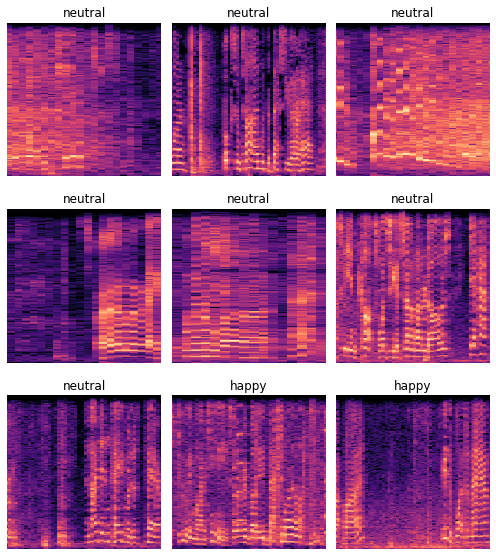

In [5]:
# let us take a look at our dataset
data.show_batch(rows=3, figsize=(7, 8))

We use `fastai` for model formation, training and producing test results.
Here we use the model ResNet34 and train it with the metrics `error_rate` to define the error produced by our trained model

In [7]:
from fastai.metrics import error_rate
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/gabru-md/anaconda3/envs/test/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [8]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.663450,1.231866,0.425428,14:40
1,1.139612,1.069587,0.392421,15:34
2,1.036578,1.026451,0.372861,14:19
3,0.901596,1.014729,0.376528,15:06


from the above results we see that the error rate is nearly 37.6% which means that the accuracy must be 62.4% for our trained model

In [9]:
learn.unfreeze()

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


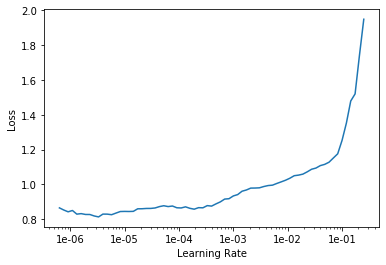

In [11]:
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4, max_lr=slice(3e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.854003,1.011895,0.366137,19:55
1,0.859245,1.001976,0.361858,23:10
2,0.811255,0.991637,0.363081,23:37
3,0.764615,0.994169,0.364303,22:45


After tuning the parameters we get an error rate of 36.4% which means an accuracy of 63.6%

In [15]:
learn.save('speech-recog-midas-model')
learn.export()

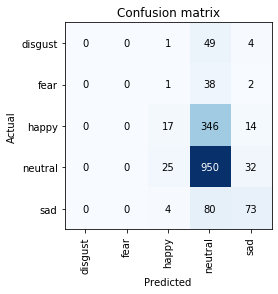

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Conclusion

The trained model is not correct. Why?

It is because the dataset provided to us is skewed i.e. it contains huge amounts of samples from the `neutral` class and therefore the model is biased for the `neutral` class and is likely to produce the result as `neutral` for almost any input. The number of files of `neutral` alone is more than 4.7k which is more than 50% of the total dataset allocated to only one class.

Hence due to this skewed data we can easily assume that the model will, in almost all the cases, produce the result as `neutral` for any input audio


### Author - Manish Devgan

## Let's try by removing some data - Just a test

Let's try to make the number of samples normal, i.e. making them equal for the classes that contain abnormally high data. We will do the following things

- remove samples randomly to form new dataset
- retrain a new model 
- compute the accuracy

In [6]:
# preprocessing new data
# undersampling some of neutral, sad and happy data to under 600
norm_train_data = "meld/norm_train_data/train/"
norm_train_neutral = norm_train_data + "neutral/"
norm_train_happy = norm_train_data + "happy/"
norm_train_sad = norm_train_data + "sad/"

toKeep = 602 # number of files to keep for each classes

from random import sample

files = os.listdir(norm_train_neutral)
toDelete = len(files) - toKeep
print("[!] deleting %d of neutral samples."%(toDelete))
for file in sample(files,len(files) - toKeep):
    os.remove(norm_train_neutral + file)

files = os.listdir(norm_train_happy)
toDelete = len(files) - toKeep
print("[!] deleting %d of happy samples."%(toDelete))
for file in sample(files,len(files) - toKeep):
    os.remove(norm_train_happy + file)

files = os.listdir(norm_train_sad)
toDelete = len(files) - toKeep
print("[!] deleting %d of sad samples."%(toDelete))
for file in sample(files,len(files) - toKeep):
    os.remove(norm_train_sad + file)

[!] deleting 0 of neutral samples.
[!] deleting 0 of happy samples.
[!] deleting 0 of sad samples.


In [7]:
NORM_TRAIN_DATA = "meld/norm_train_data"
np.random.seed(42)
bs = 32
data = ImageDataBunch.from_folder(NORM_TRAIN_DATA, train='.', valid_pct=0.2, size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

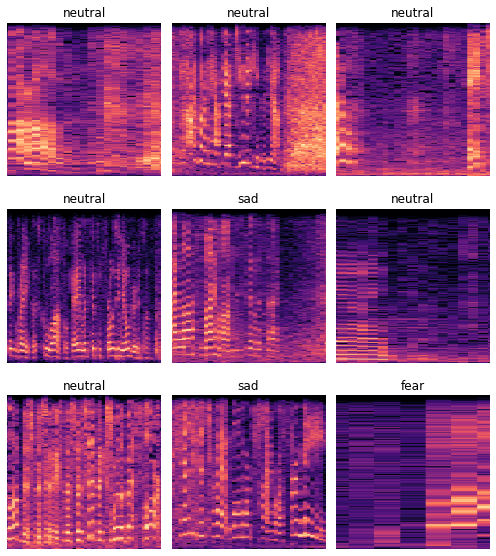

In [8]:
defaults.device = torch.device('cuda')
data.show_batch(rows=3, figsize=(7, 8))

In [9]:
from fastai.metrics import error_rate
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/home/gabru-md/anaconda3/envs/test/lib/python3.7/site-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [10]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.442751,2.007550,0.667208,05:46
1,1.940101,1.541955,0.618506,06:09
2,1.498502,1.454325,0.586039,06:20
3,1.251315,1.442032,0.581169,07:06


In [11]:
learn.unfreeze()

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


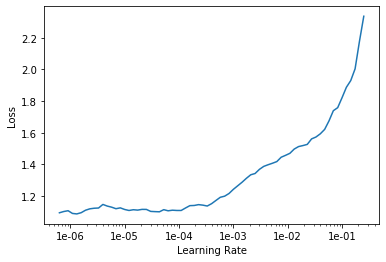

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(2e-5))

epoch,train_loss,valid_loss,error_rate,time
0,1.124857,1.448437,0.576299,07:57
1,1.117763,1.433374,0.576299,08:57
2,1.090845,1.432862,0.576299,09:21
3,1.059094,1.440755,0.574675,09:21


In [16]:
learn.save('speech-recog-midas-model-2')
learn.export()

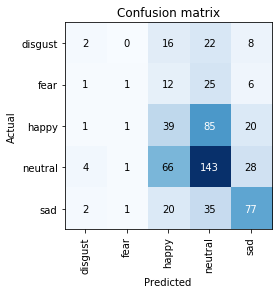

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### New Conclusion

We get an error rate of 57% and accuracy of about 43%. This is just a test to see if better results and accuracy can be achieved.